# Package loading and basic configurations

In [8]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [22]:
bbox = BboxSelector([
    7.6083221048,51.9739835019,7.6122070425,51.9744329683 # bounding box for part of York ring, perpendicular to Steinfurter Str.
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,GPS Accuracy.value,GPS Accuracy.unit,Intake Pressure.value,Intake Pressure.unit,GPS Altitude.value,GPS Altitude.unit,GPS VDOP.value,...,O2 Lambda Current ER.value,O2 Lambda Current ER.unit,O2 Lambda Current.value,O2 Lambda Current.unit,Long-Term Fuel Trim 1.value,Long-Term Fuel Trim 1.unit,Short-Term Fuel Trim 1.value,Short-Term Fuel Trim 1.unit,track.appVersion,track.touVersion
0,5e08bc845bc8db428964203f,2019-12-29T12:11:19,POINT (7.27089 53.52839),1.899800,%,36.000001,kPa,45.999999,m,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e08bc845bc8db4289642041,2019-12-29T12:11:25,POINT (7.27071 53.52830),2.033838,%,56.470588,kPa,44.999999,m,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e08bc845bc8db4289642042,2019-12-29T12:11:30,POINT (7.27037 53.52828),1.500000,%,35.000000,kPa,44.000000,m,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e08bc845bc8db4289642043,2019-12-29T12:11:35,POINT (7.27023 53.52824),2.000000,%,38.000001,kPa,44.999999,m,0.610282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e08bc845bc8db4289642044,2019-12-29T12:11:40,POINT (7.27023 53.52824),2.500000,%,41.190981,kPa,45.000001,m,0.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,52f47944e4b0d8e8c286fb51,2014-02-06T15:36:51,POINT (7.64786 51.95515),8.000000,%,103.000000,kPa,106.000000,m,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Version 0.8.0 (20), 1/30/14 12:55 PM",2013-10-01
577,52f47944e4b0d8e8c286fb53,2014-02-06T15:36:57,POINT (7.64782 51.95520),5.000000,%,105.000000,kPa,107.000000,m,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Version 0.8.0 (20), 1/30/14 12:55 PM",2013-10-01
578,52f47944e4b0d8e8c286fb55,2014-02-06T15:37:03,POINT (7.64776 51.95518),7.000000,%,104.000000,kPa,104.000000,m,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Version 0.8.0 (20), 1/30/14 12:55 PM",2013-10-01
579,52f47944e4b0d8e8c286fb57,2014-02-06T15:37:09,POINT (7.64778 51.95517),6.000000,%,104.000000,kPa,105.000000,m,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Version 0.8.0 (20), 1/30/14 12:55 PM",2013-10-01


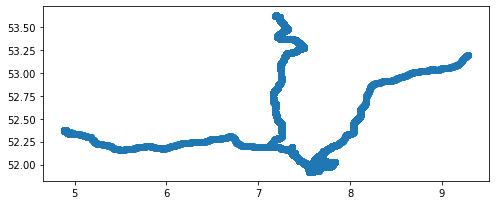

In [27]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

In [53]:
some_track_id = track_df['track.id'].unique()[5]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track

,id,time,geometry,GPS Accuracy.value,GPS Accuracy.unit,Intake Pressure.value,Intake Pressure.unit,GPS Altitude.value,GPS Altitude.unit,GPS VDOP.value,...,O2 Lambda Current ER.value,O2 Lambda Current ER.unit,O2 Lambda Current.value,O2 Lambda Current.unit,Long-Term Fuel Trim 1.value,Long-Term Fuel Trim 1.unit,Short-Term Fuel Trim 1.value,Short-Term Fuel Trim 1.unit,track.appVersion,track.touVersion
0,580c4f32e4b01fb1c08cac3d,2016-10-19T05:37:31,POINT (7.64687 51.95714),13.000000,%,124.528922,kPa,59.000000,m,NaN,...,0.996979,ratio,-58.912224,A,NaN,NaN,NaN,NaN,NaN,NaN
1,580c4f32e4b01fb1c08cac3f,2016-10-19T05:37:36,POINT (7.64704 51.95753),13.667007,%,106.999997,kPa,61.332993,m,NaN,...,0.996979,ratio,-39.479080,A,NaN,NaN,NaN,NaN,NaN,NaN
2,580c4f32e4b01fb1c08cac40,2016-10-19T05:37:41,POINT (7.64722 51.95782),13.197605,%,103.000003,kPa,62.000000,m,NaN,...,0.996979,ratio,-19.765980,A,NaN,NaN,NaN,NaN,NaN,NaN
3,580c4f32e4b01fb1c08cac41,2016-10-19T05:37:46,POINT (7.64745 51.95814),13.000000,%,101.360759,kPa,63.000000,m,NaN,...,0.996979,ratio,-0.177902,A,NaN,NaN,NaN,NaN,NaN,NaN
4,580c4f32e4b01fb1c08cac42,2016-10-19T05:37:51,POINT (7.64737 51.95820),11.000000,%,102.000003,kPa,60.000000,m,NaN,...,0.996979,ratio,19.316067,A,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,580c4f32e4b01fb1c08cacca,2016-10-19T05:49:12,POINT (7.60259 51.96922),12.000000,%,103.000002,kPa,66.999999,m,NaN,...,1.999969,ratio,99.808084,A,NaN,NaN,NaN,NaN,NaN,NaN
141,580c4f32e4b01fb1c08caccb,2016-10-19T05:49:17,POINT (7.60261 51.96923),11.866149,%,168.430380,kPa,67.000000,m,NaN,...,1.546888,ratio,-114.892554,A,NaN,NaN,NaN,NaN,NaN,NaN
142,580c4f32e4b01fb1c08caccc,2016-10-19T05:49:22,POINT (7.60200 51.96915),10.000000,%,228.903219,kPa,67.153523,m,NaN,...,1.915202,ratio,-95.395675,A,NaN,NaN,NaN,NaN,NaN,NaN
143,580c4f32e4b01fb1c08caccd,2016-10-19T05:49:27,POINT (7.60105 51.96925),13.128074,%,127.830882,kPa,66.000001,m,NaN,...,1.999970,ratio,-76.018468,A,NaN,NaN,NaN,NaN,NaN,NaN


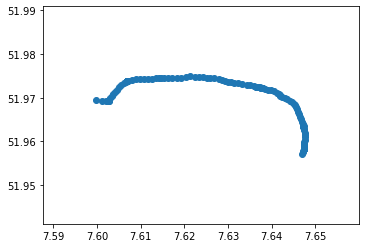

In [54]:
some_track.plot()

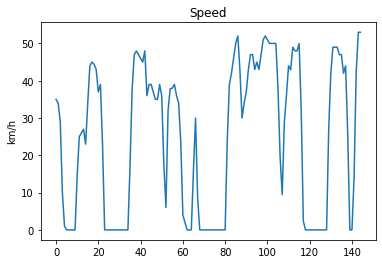

In [55]:
ax = some_track['Speed.value'].plot()
ax.set_title("Speed")
ax.set_ylabel(some_track['Speed.unit'][0])
ax

Plot GPS Altitude values to compare with Speeds plot above.

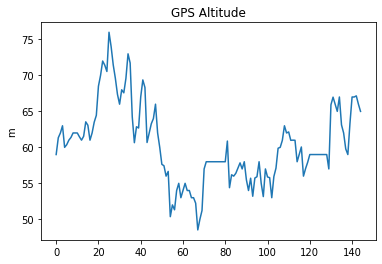

In [62]:
ax = some_track['GPS Altitude.value'].plot()
ax.set_title("GPS Altitude")
ax.set_ylabel(some_track['GPS Altitude.unit'][0])
ax

While a lot of speed values are missing. If we look at the 100th measurement of both speed and altitude, there is clearly an inverse relation between the two i.e., higher speed at lower altitudes. 

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [56]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [57]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=7.5963592529296875,
    latitude=51.96246168188569,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state #, mapbox_key=<mapbox-key-here>
)
r.to_html('tracks_muenster.html', iframe_width=900)

'/Users/saad/Documents/Geoinformatics/third-semester/FCDA/envirocar-py/examples/tracks_muenster.html'